# How convolutional networks see the world

In this notebook we visualize the patterns learned by different layers of a convolutional neural network (cnn) to see how cnns understand the images fed to them. Each convolution layer has several filters that each learn a certain template. For example, a filter can be used to detect simple templates such as a line or curve or a more complex feature such as an eye. An image containing a similar template when filtered through these filters will maximize the output of that filter. Filters are also referred to as kernels. Some example filters can be seen [here](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

We use the cifar-10 image dataset for this exercise. Details of the cifar-10 dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). 

**Note:** To better understand this exercise read Chapter 5 of Francois Chollet's Deep Learning with Python book. It is available online through the RHUL library [here](https://www.safaribooksonline.com/library/view/Deep+Learning+with+Python/9781617294433/kindle_split_015.html#ch05).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.cm as cm  # colormaps

%matplotlib inline

In [68]:
# If running on MAC run this
from keras.datasets import cifar10
from keras import layers
from keras import models 
from keras.layers import BatchNormalization
from keras.utils.np_utils import to_categorical
from keras import backend as K

ModuleNotFoundError: No module named 'keras'

In [69]:
# If running on WINDOWS run this
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras import models 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [4]:
# Load cifar-10 image dataset. Details of the CIFAR-10 dataset can be found 
(cx_train, cy_train),(cx_test, cy_test) = cifar10.load_data()
print(cx_train.shape)
print(cy_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
#Function to display the images
def plot_colour_images(images_to_plot, titles=None, ncols=6, thefigsize=(18,18)):
    # images_to_plot: list of images to be displayed
    # titles: list of titles corresponding to the images
    # ncols: The number of images per row to display. The number of rows 
    #        is computed from the number of images to display and the ncols
    # theFigsize: The size of the layour of all the displayed images
    
    n_images = images_to_plot.shape[0]
    
    # Compute the number of rows
    nrows = np.ceil(n_images/ncols).astype(int)
    
    fig,ax = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=thefigsize)
    ax = ax.flatten()

    for i in range(n_images):
        ax[i].imshow( images_to_plot[i,:,:,:]) 
            # cmap=cm.Greys plots in Grey scale so the image looks as if it were written
        ax[i].axis('off')  
        if titles is not None:
            ax[i].set_title(titles[i])

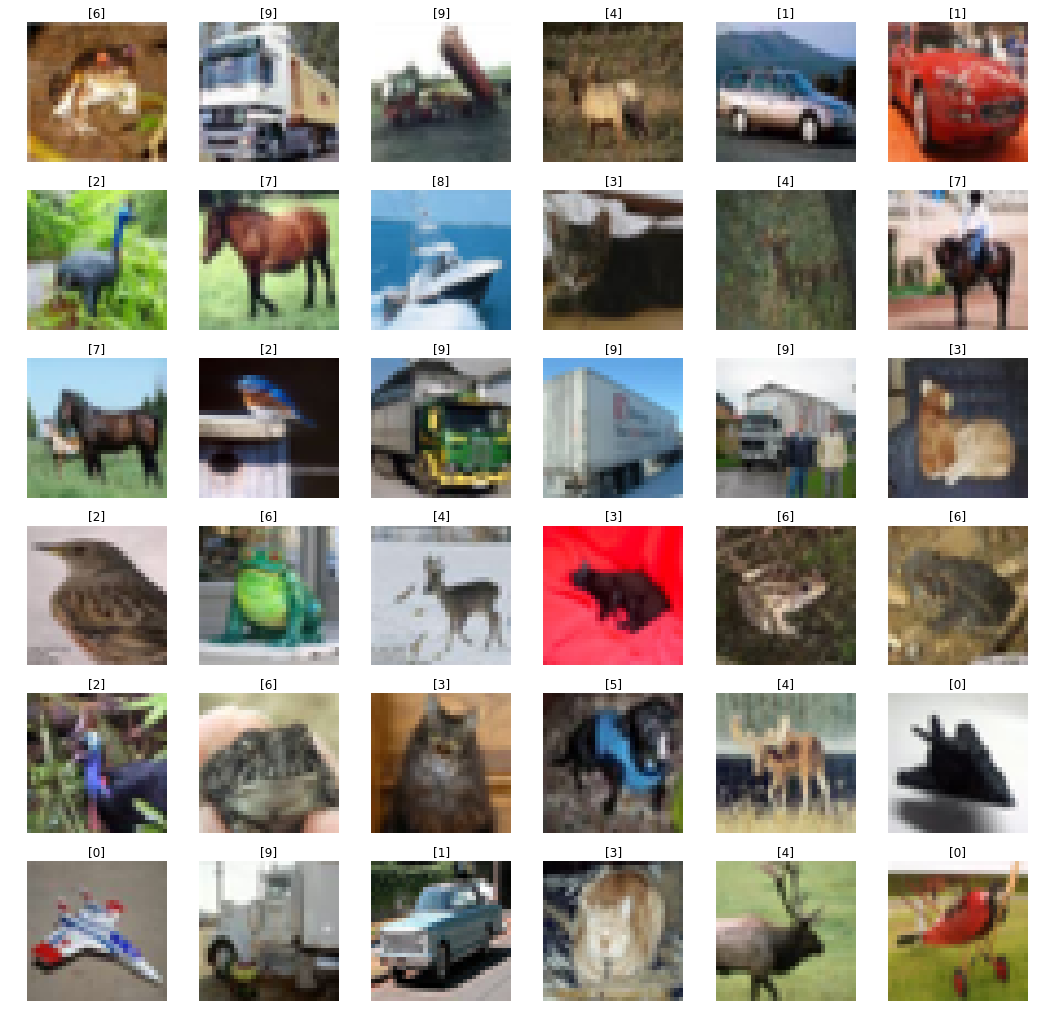

In [6]:
plot_colour_images( cx_train[:36,:,:], ncols=6,titles= cy_train[:36])

In [7]:
# We start by creating a CNN model

# Convolutional layers
model = models.Sequential()
filter_size = (3,3)
filters = 32
model.add(layers.Conv2D(filters, filter_size,  padding='same',activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization()) 
model.add(layers.Conv2D(filters, filter_size,  padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

filters = 64
model.add(layers.Conv2D(filters, filter_size,  padding='same',activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.Conv2D(filters, filter_size,  padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

filters = 128
model.add(layers.Conv2D(filters, filter_size,  padding='same',activation='relu'))
model.add(BatchNormalization()) 
model.add(layers.Conv2D(filters, filter_size,  padding='same',activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))



In [8]:
#classification layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
__________

This creates a convolutional network similar to Figure 1. 

![Image](figures/cnn_arch.png?raw=true)

Figure 1: Architecture of a CNN — Source: https://www.mathworks.com/videos/introduction-to-deep-learning-what-are-convolutional-neural-networks--1489512765771.html

In [10]:
# to use softmax, we need to alter the class representations from integers to 'one-hot' 
cy_train_one_hot = to_categorical(cy_train)
cy_test_one_hot = to_categorical(cy_test)
cy_train_one_hot.shape, cy_train_one_hot.shape

((50000, 10), (50000, 10))

In [11]:
train_size = 25000

In [12]:
# Train the model
model.reset_states() 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(cx_train[:train_size], cy_train_one_hot[:train_size,:], epochs=15, batch_size=64, shuffle=True)

Epoch 1/15
25000/25000 [==============================] - 9s 344us/step - loss: 1.6021 - acc: 0.4464
Epoch 2/15
25000/25000 [==============================] - 5s 215us/step - loss: 0.9945 - acc: 0.6508
Epoch 3/15
25000/25000 [==============================] - 5s 216us/step - loss: 0.7866 - acc: 0.7232
Epoch 4/15
25000/25000 [==============================] - 5s 215us/step - loss: 0.6334 - acc: 0.7795
Epoch 5/15
25000/25000 [==============================] - 5s 214us/step - loss: 0.5125 - acc: 0.8228
Epoch 6/15
25000/25000 [==============================] - 5s 214us/step - loss: 0.4072 - acc: 0.8583
Epoch 7/15
25000/25000 [==============================] - 5s 214us/step - loss: 0.3297 - acc: 0.8850
Epoch 8/15
25000/25000 [==============================] - 5s 215us/step - loss: 0.2511 - acc: 0.9122
Epoch 9/15
25000/25000 [==============================] - 5s 214us/step - loss: 0.2085 - acc: 0.9277
Epoch 10/15
25000/25000 [==============================] - 5s 216us/step - loss: 0.1738 - a

In [19]:
# The loss and accuracy per epoch
history.history

{'loss': [1.6316205630874634,
  1.0153706241989136,
  0.7884544301986695,
  0.6382417852020263,
  0.5096816607475281,
  0.4043284581375122,
  0.31712022172927856,
  0.24829937994956972,
  0.1973372229409218,
  0.162934553399086,
  0.14175682690143585,
  0.13063042724370957,
  0.12196176885128021,
  0.11407291872262955,
  0.0982797850036621],
 'acc': [0.43704,
  0.6413200000190735,
  0.7253600000381469,
  0.7784,
  0.819800000038147,
  0.858640000038147,
  0.8894,
  0.9124399999809265,
  0.9322399999809265,
  0.942759999961853,
  0.950839999961853,
  0.9548400000190734,
  0.958200000038147,
  0.9608800000190735,
  0.9674800000381469]}

A convolution works by sliding filters of size 3 × 3 over the 3D input feature map, stopping at every possible location, and extracting the 3D patch of surrounding features of shape (filter_height, filter_width, input_depth). Each such 3D patch is then transformed (via a tensor product with the filter or convolution kernel shown in Figure 3) into a 1D vector of shape (output_depth,), shown in Figure 4.

![Image](figures/cnn_dot_prod.png?raw=true)

Figure 3: The filter slides over the input and performs its output on the new layer. — Source: https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2

All of these vectors are then spatially reassembled into a 3D output map of shape (height, width, output_depth). Every spatial location in the output feature map corresponds to the same location in the input feature map (for example,the lower-right corner of the output contains information about the lower-right corner of the input). For instance, with 3× 3 windows, the vector output[i, j, :] comes from the 3D patch input[i-1:i+1, j-1:j+1, :]. The full process is detailed in Figure 2. 

![Image](figures/cnn_mapping.jpg?raw=true)

Figure 2: How convolution works - Source Francois Chollet's Deep Learning with Python


Now that we know how convolution works and what filters are let us look at what input images maximize the output of each filter in a convolutional layer in the model we learnt. To see what the Conv layer is doing, a simple option is to apply the filter over raw input pixels to see what images contain the patterns that correspond to the pattern in the filter. 

The idea behind activation maximization of a filter is simple - generate an input image that maximizes the filter output activations. That is, we compute the gradient:

$$\frac{\delta input}{\delta ActivationMaximizationLoss}$$

where ActivationMaximizationLoss of the Nth filter is the loss function that maximizes the activation of the Nth filter. We use that estimate to update the input during gradient ascent.

In [14]:
# Get the names of the outputs of each layer in the model
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1dfc497f978>,
 'batch_normalization': <tensorflow.python.keras.layers.normalization.BatchNormalization at 0x1dfc4954c18>,
 'conv2d_1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1dfc4968668>,
 'max_pooling2d': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x1dfc4954550>,
 'conv2d_2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1dfc49c4320>,
 'batch_normalization_1': <tensorflow.python.keras.layers.normalization.BatchNormalization at 0x1dfc49c4ef0>,
 'conv2d_3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1dfc4ee9668>,
 'max_pooling2d_1': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x1dfc4f73828>,
 'conv2d_4': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x1dfc4f73630>,
 'batch_normalization_2': <tensorflow.python.keras.layers.normalization.BatchNormalization at 0x1dfc4ee9550>,
 'conv2d_5': <tensorflow.python.keras.layers.convolutional.Conv2D a

In [75]:
# Define a function that returns a function to compute the loss and gradient of the input wrt to the loss for
# a given layer_name and filter_index
def get_iterate(layer_name, filter_index, layer_dict):
    
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # We add an input placeholder with a size the same as the input image
    input_img = model.inputs[0]

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])
    
    return iterate

In [76]:
# Utility function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((0, 1, 2))
    x = np.clip(x, 0, 255).astype('uint8')
    return x


In [77]:
# Function to visualize the activate of given filter in the given layer
def visualize_activation(layer_name, filter_index, layer_dict):
    iterate = get_iterate(layer_name, i, layer_dict)
    
    input_img_data = np.random.random((1,32, 32, 3)) * 20 + 128.
    step = 1
    
    for _ in range(20):
        loss_value, grads_value = iterate([input_img_data])
        # some filters get stuck to 0, we can skip them
        if loss_value <= K.epsilon():
            return None
        # Add the gradients to the input image
        input_img_data += grads_value * step
    img = deprocess_image(input_img_data[0])
    return img

In [79]:
# We will maximize activation of all the filters in the last convolutional layer ('conv2d_5'), as they learn more complex patterns. 
# But you can use the same procedure to visualize any filter in any layer.

# Filters that get stuck in 0 are skipped

layer_name = 'conv2d_5'

# Get the number of filters in layer_name
output_layer = layer_dict[layer_name]
num_filters = len(output_layer.get_weights()[1])
print('Layer ', layer_name, ' has ', num_filters, ' filters')
processed_filters = []
for i in range(0, num_filters):
    img = visualize_activation(layer_name, i, layer_dict)
    if not img is None: 
        print('Processed filter ', i)
        processed_filters.append((img, loss_value))
print('Number of filters with non-zero loss are ', len(processed_filters))

Layer  conv2d_5  has  128  filters
Processed filter  0
Processed filter  2
Processed filter  10
Processed filter  19
Processed filter  20
Processed filter  22
Processed filter  23
Processed filter  24
Processed filter  26
Processed filter  27
Processed filter  31
Processed filter  39
Processed filter  40
Processed filter  43
Processed filter  52
Processed filter  53
Processed filter  54
Processed filter  55
Processed filter  56
Processed filter  62
Processed filter  65
Processed filter  66
Processed filter  72
Processed filter  73
Processed filter  77
Processed filter  78
Processed filter  79
Processed filter  81
Processed filter  82
Processed filter  83
Processed filter  86
Processed filter  87
Processed filter  91
Processed filter  94
Processed filter  105
Processed filter  109
Processed filter  111
Processed filter  115
Processed filter  117
Processed filter  118
Processed filter  121
Processed filter  122
Processed filter  123
Processed filter  124
Processed filter  125
Processed f

In [80]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Function to create a stitched image of the individual images of the filters and save it to a file
def draw_filters(filters, model_name, output_dim=(32, 32), n=None):
        """Draw the best filters in a nxn grid.
        # Arguments
            filters: A List of generated images and their corresponding losses
                     for each processed filter.
            model_name: String specifying the name of the model
            n: dimension of the grid.
               If none, the largest possible square will be used
        """
        if n is None:
            n = int(np.floor(np.sqrt(len(filters))))

        # the filters that have the highest loss are assumed to be better-looking.
        # we will only keep the top n*n filters.
        filters.sort(key=lambda x: x[1], reverse=True)
        filters = filters[:n * n]

        # build a black picture with enough space for
        # e.g. our 8 x 8 filters of size 412 x 412, with a 5px margin in between
        MARGIN = 5
        width = n * output_dim[0] + (n - 1) * MARGIN
        height = n * output_dim[1] + (n - 1) * MARGIN
        stitched_filters = np.zeros((width, height, 3), dtype='uint8')

        # fill the picture with our saved filters
        for i in range(n):
            for j in range(n):
                img, _ = filters[i * n + j]
                width_margin = (output_dim[0] + MARGIN) * i
                height_margin = (output_dim[1] + MARGIN) * j
                stitched_filters[
                    width_margin: width_margin + output_dim[0],
                    height_margin: height_margin + output_dim[1], :] = img

        # save the result to disk
        mpimg.imsave('{0:}_{1:}_{2:}x{2:}.png'.format(model_name, layer_name, n), stitched_filters)
        image_file_name ='{0:}_{1:}_{2:}x{2:}.png'.format(model_name, layer_name, n)
        return image_file_name

Populating the interactive namespace from numpy and matplotlib


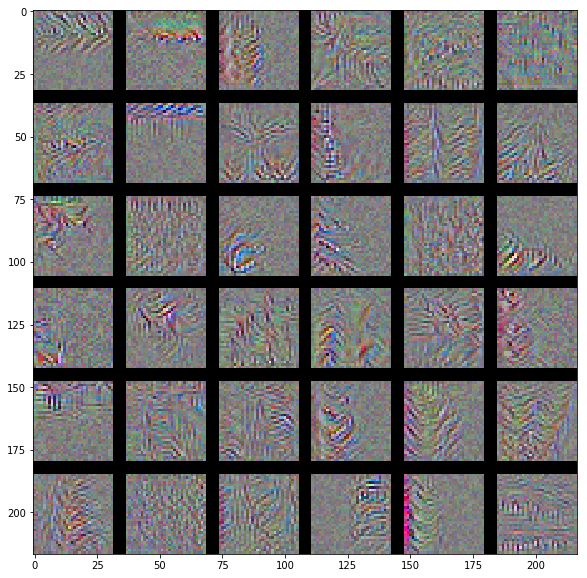

In [84]:
model_name = 'cifar-10'
result = draw_filters(processed_filters,  model_name, (32, 32))
img=mpimg.imread(result)
plt.rcParams['figure.figsize'] = (10,10)
imgplot = plt.imshow(img)
plt.show()

Try generating visualizations of activations of filters in other convolutional layers and compare the results

# Additional references for visualizing activations of convolutional layers

* Following are nice blogs that describes how convolutional networks work.
    * [An intuitive guide to Convolutional Neural Networks](https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050)
    * [Convolutional Neural Networks (CNNs / ConvNets)](http://cs231n.github.io/convolutional-networks/)
* cifar-10 images are quite low resolution so the patterns seen are not as interesting. To see more interesting visualizations of activations see the following resources to generate images that maximize activations of filters in convolutional layers of a model trained on imagenet:
    * Install [keras-vis](https://github.com/raghakot/keras-vis) and look at the [vggnet example](https://github.com/raghakot/keras-vis/tree/master/examples/vggnet).
    * [How convolutional neural networks see the world](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html) blog by Francois Chollet.
